# Human Kidney Cancer dataset multiome preprocessing

In [1]:
file_path = "/Users/isabelgiray/Desktop/TUM/3.Semester/Computational_Methods_for_Single_cell_biology/H_Kidney_Cancer_Chromium_Nuc_Iso_vs_SaltyEZ_vs_ComplexTissueDP_filtered_feature_bc_matrix.h5"

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import muon as mu
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versi

In [3]:
mdata = mu.read_10x_h5(file_path)
mdata.var_names_make_unique()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Added `interval` annotation for features from /Users/isabelgiray/Desktop/TUM/3.Semester/Computational_Methods_for_Single_cell_biology/H_Kidney_Cancer_Chromium_Nuc_Iso_vs_SaltyEZ_vs_ComplexTissueDP_filtered_feature_bc_matrix.h5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mudata/_core/mudata.py:915: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-package

In [4]:
mdata

MuData object with n_obs × n_vars = 22772 × 103751
  var:	'gene_ids', 'feature_types', 'genome', 'interval'
  2 modalities
    rna:	22772 x 36601
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
    atac:	22772 x 67150
      var:	'gene_ids', 'feature_types', 'genome', 'interval'

# Preprocessing of RNA

In [5]:
rna = mdata.mod['rna']
rna

AnnData object with n_obs × n_vars = 22772 × 36601
    var: 'gene_ids', 'feature_types', 'genome', 'interval'

In [6]:
rna.var_names_make_unique()

In [7]:
rna.var['mt'] = rna.var_names.str.startswith('MT-')

In [8]:
sc.pp.calculate_qc_metrics(
    rna, qc_vars=['mt'], inplace=True, percent_top=[20],log1p=True
)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


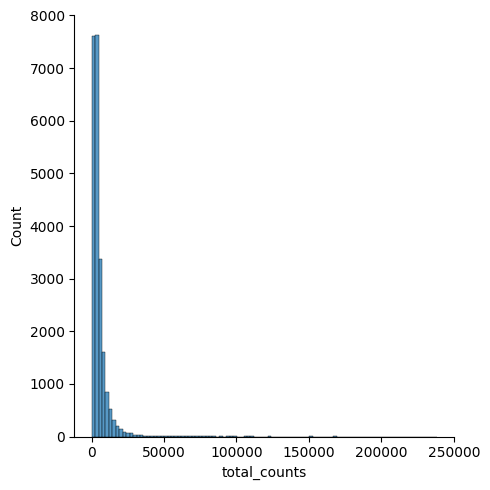

In [9]:
p1 = sns.displot(rna.obs["total_counts"], bins=100, kde=False)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


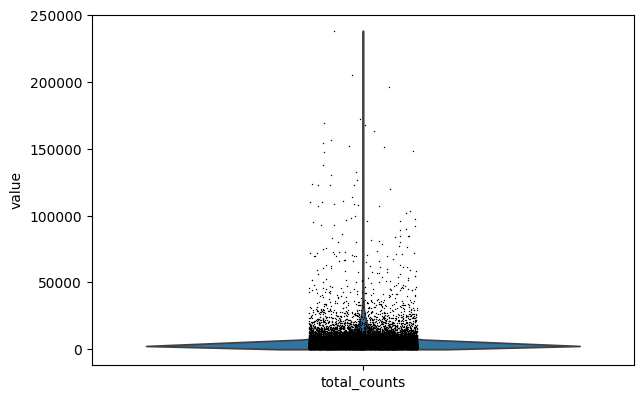

In [10]:
p8 = sc.pl.violin(rna, 'total_counts')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


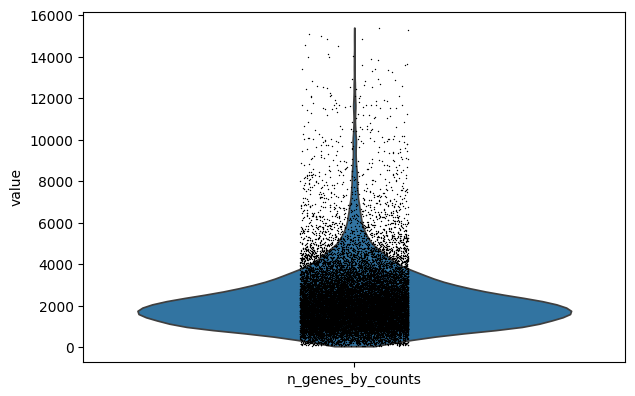

In [11]:
p5 = sc.pl.violin(rna, 'n_genes_by_counts')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


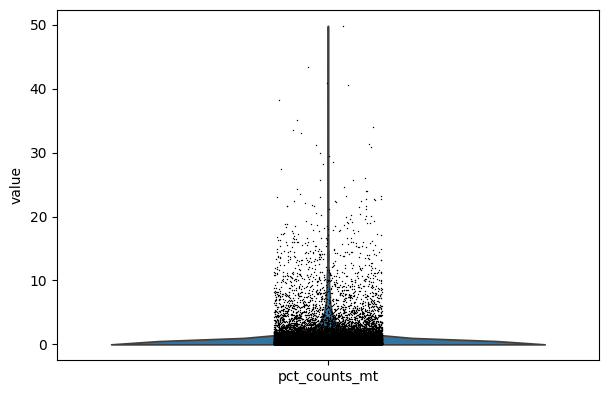

In [12]:
p2 = sc.pl.violin(rna, "pct_counts_mt")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/plotting/_utils.py:716: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]


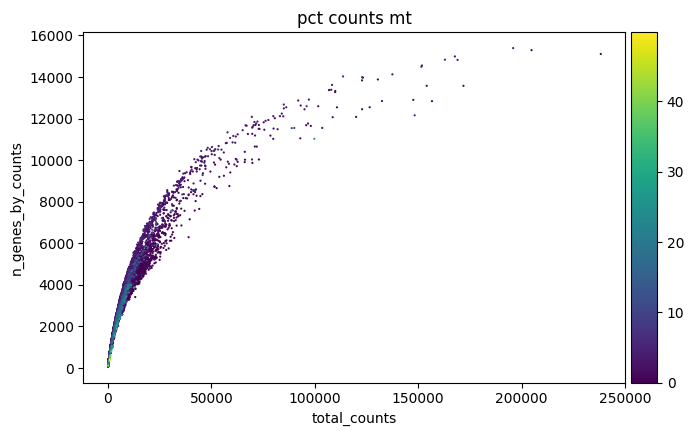

In [13]:
p3 = sc.pl.scatter(rna, "total_counts", "n_genes_by_counts", color="pct_counts_mt",size=10)

In [14]:
rna

AnnData object with n_obs × n_vars = 22772 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [15]:
sc.pp.filter_cells(rna, min_genes=300)#300
sc.pp.filter_cells(rna, max_genes=10000)#10000

In [16]:
rna

AnnData object with n_obs × n_vars = 22318 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [17]:
rna = rna[rna.obs['total_counts'] >= 2000, :]#2000
rna = rna[rna.obs['total_counts'] <= 60000, :]#20000

In [18]:
rna

View of AnnData object with n_obs × n_vars = 16838 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [19]:
rna = rna[rna.obs['pct_counts_mt'] < 10, :]

In [20]:
rna

View of AnnData object with n_obs × n_vars = 16523 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

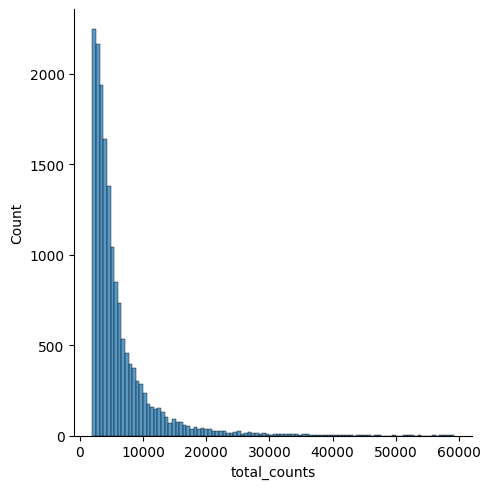

In [21]:
p1 = sns.displot(rna.obs["total_counts"], bins=100, kde=False)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


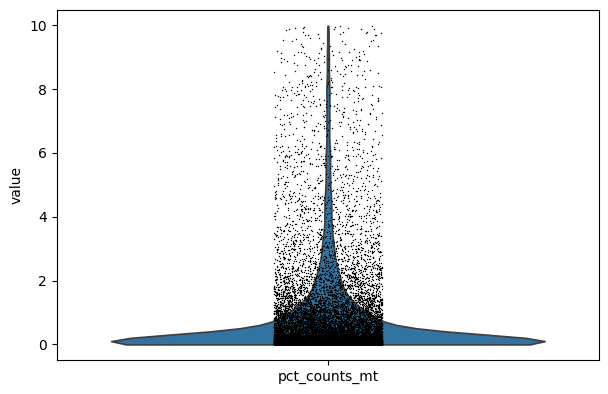

In [22]:
p2 = sc.pl.violin(rna, "pct_counts_mt")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


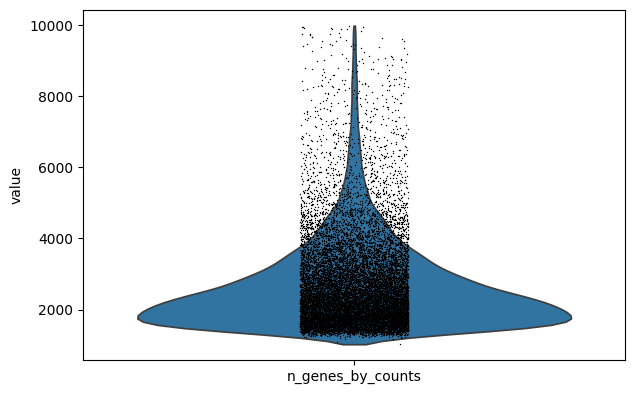

In [23]:
p6 = sc.pl.violin(rna, 'n_genes_by_counts')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/plotting/_utils.py:716: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]


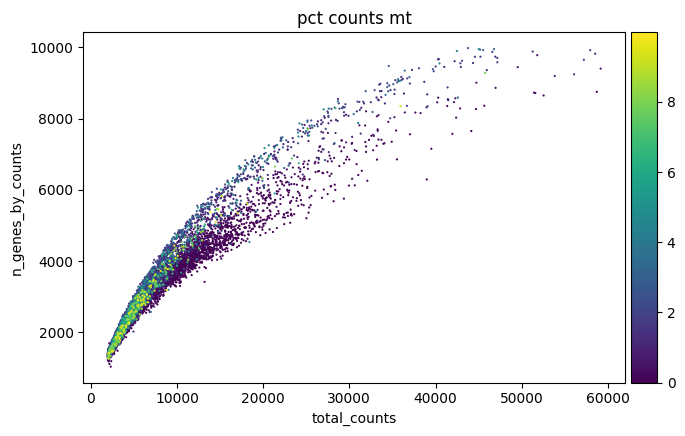

In [24]:
p3 = sc.pl.scatter(rna, "total_counts", "n_genes_by_counts", color="pct_counts_mt",size=10)

In [25]:
sc.pp.normalize_total(rna)
sc.pp.log1p(rna)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [26]:
sc.pp.highly_variable_genes(rna, n_top_genes=2000)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


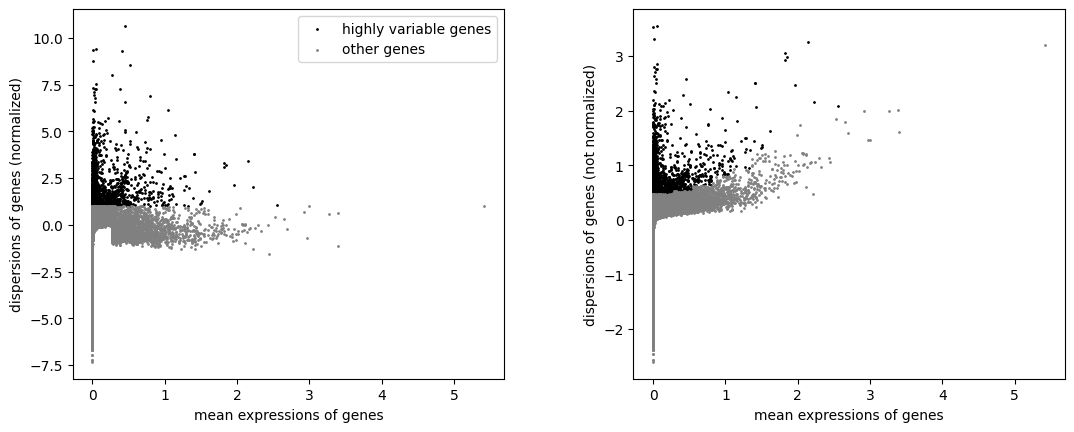

In [27]:
sc.pl.highly_variable_genes(rna)

In [28]:
rna = rna[:, rna.var.highly_variable]

In [29]:
rna

View of AnnData object with n_obs × n_vars = 16523 × 2000
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [30]:
sc.tl.pca(rna)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


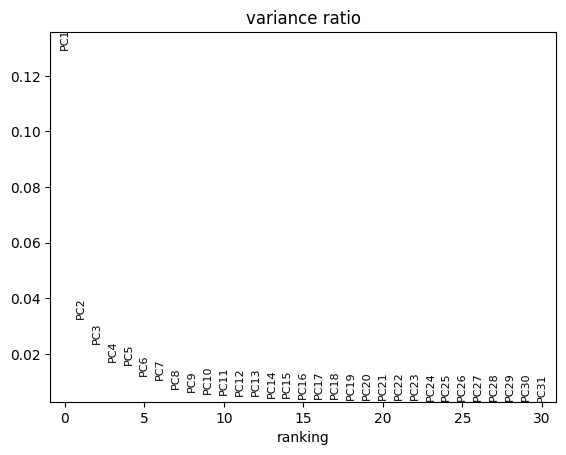

In [31]:
sc.pl.pca_variance_ratio(rna)

In [32]:
sc.pp.neighbors(rna)

In [33]:
sc.tl.umap(rna)

In [34]:
sc.tl.leiden(rna)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


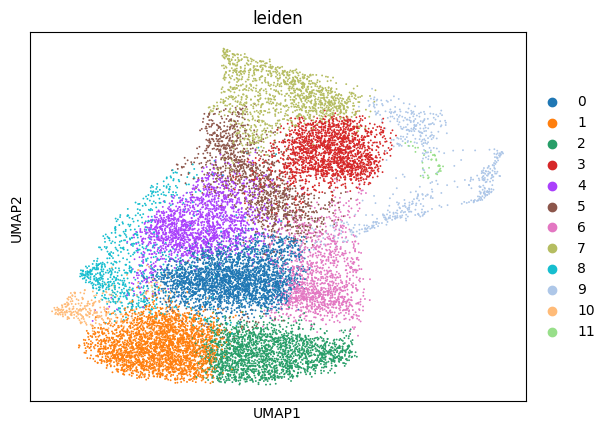

In [35]:
sc.pl.umap(rna, color='leiden')

# Processing chromatin accessibility

n_genes_by_counts: measures the amount of open regions in the cell.
total_counts: measures total accessibilty over all open regions.

In [36]:
from muon import atac as ac

In [37]:
atac = mdata.mod['atac']
atac

AnnData object with n_obs × n_vars = 22772 × 67150
    var: 'gene_ids', 'feature_types', 'genome', 'interval'

In [38]:
sc.pp.calculate_qc_metrics(atac, percent_top=None, log1p=False, inplace=True)

In [39]:
atac

AnnData object with n_obs × n_vars = 22772 × 67150
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

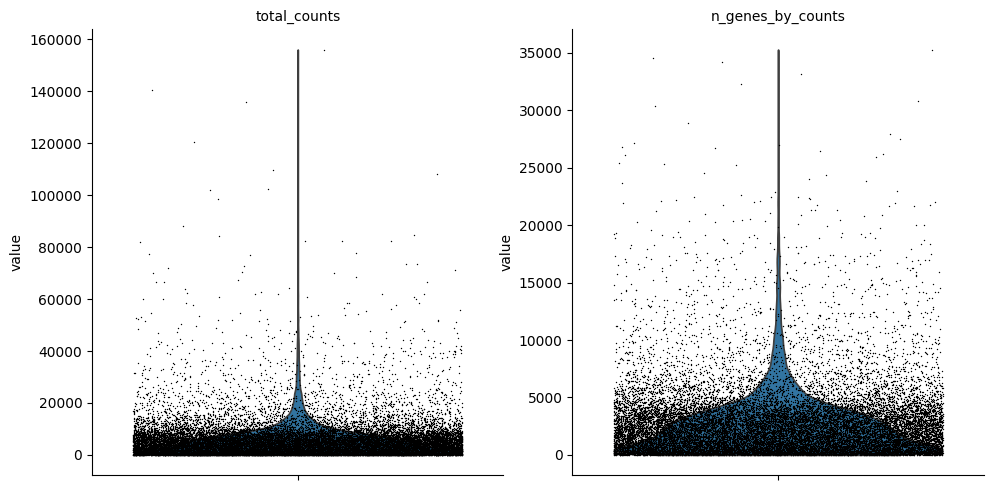

In [40]:
sc.pl.violin(atac, ['total_counts', 'n_genes_by_counts'], jitter=0.4, multi_panel=True)

In [41]:
atac.var['n_cells_by_counts'].max()
atac.var['n_cells_by_counts'].min()
atac.var['n_cells_by_counts'].mean()

911.9699627699181

In [42]:
import matplotlib.pyplot as plt

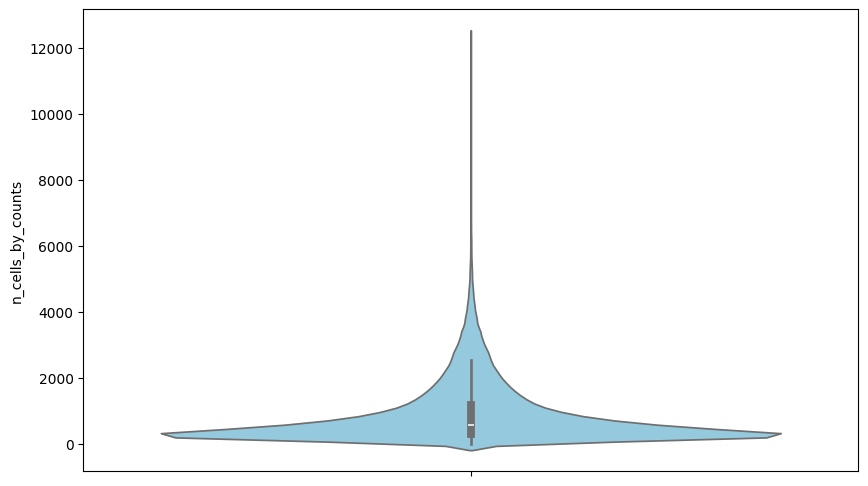

In [43]:
plt.figure(figsize=(10,6))
sns.violinplot(data=atac.var['n_cells_by_counts'],color='skyblue')
plt.show()

In [44]:
mu.pp.filter_var(atac, 'n_cells_by_counts', lambda x: x >= 20)
mu.pp.filter_var(atac, 'n_cells_by_counts', lambda x: x <= 8000)


In [45]:
atac

AnnData object with n_obs × n_vars = 22772 × 67144
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [46]:
mu.pp.filter_obs(atac, 'n_genes_by_counts', lambda x: (x >= 500) & (x <= 20000))

In [47]:
mu.pp.filter_obs(atac, 'total_counts', lambda x: (x >= 500) & (x <= 40000))

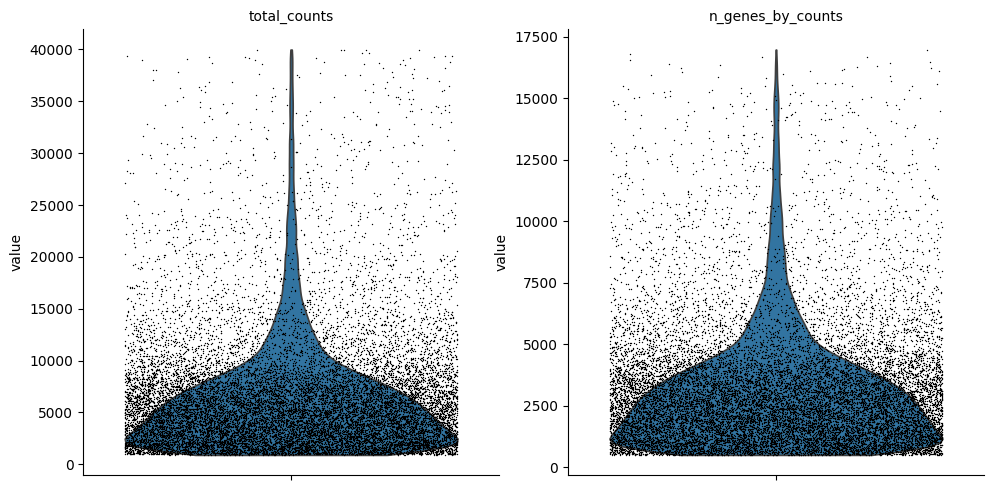

In [48]:
sc.pl.violin(atac, ['total_counts', 'n_genes_by_counts'], jitter=0.4, multi_panel=True)

In [49]:
atac

AnnData object with n_obs × n_vars = 18288 × 67144
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

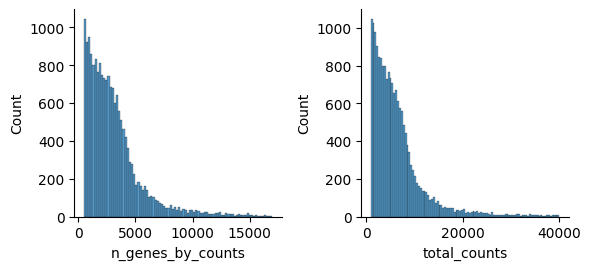

In [50]:
mu.pl.histogram(atac, ['n_genes_by_counts', 'total_counts'])

In [51]:
atac.layers['counts'] = atac.X

In [52]:
sc.pp.normalize_per_cell(atac, counts_per_cell_after=1e4)
sc.pp.log1p(atac)

In [53]:
sc.pp.highly_variable_genes(atac, min_mean=0.05, max_mean=1.5, min_disp=.5)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


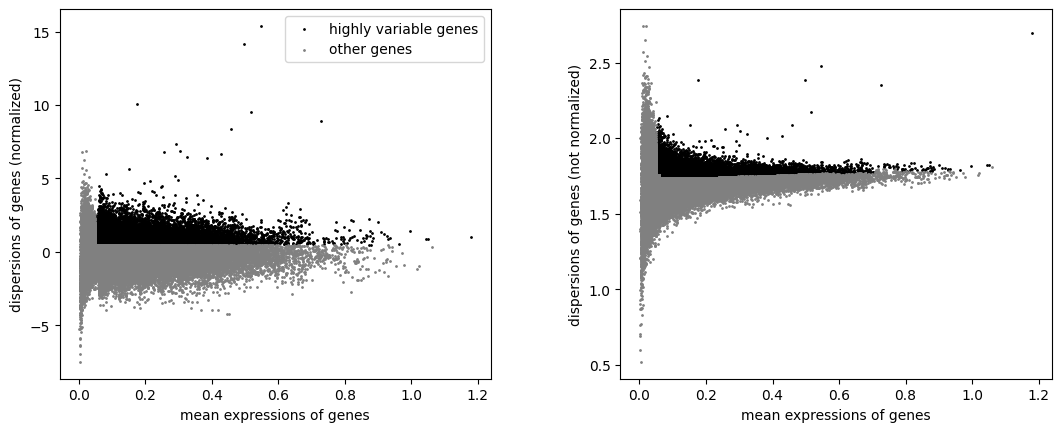

In [54]:
sc.pl.highly_variable_genes(atac)

In [55]:
np.sum(atac.var.highly_variable)

13150

In [56]:
atac.raw = atac

In [57]:
ac.tl.lsi(atac)

We find the first component is typically associated with number of peaks or counts per cell so it is reasonable to remove it:

In [58]:
atac.obsm['X_lsi'] = atac.obsm['X_lsi'][:,1:]
atac.varm["LSI"] = atac.varm["LSI"][:,1:]
atac.uns["lsi"]["stdev"] = atac.uns["lsi"]["stdev"][1:]

In [59]:
sc.pp.neighbors(atac, use_rep="X_lsi", n_neighbors=10, n_pcs=30)

In [60]:
sc.pp.scale(atac)
sc.tl.pca(atac)

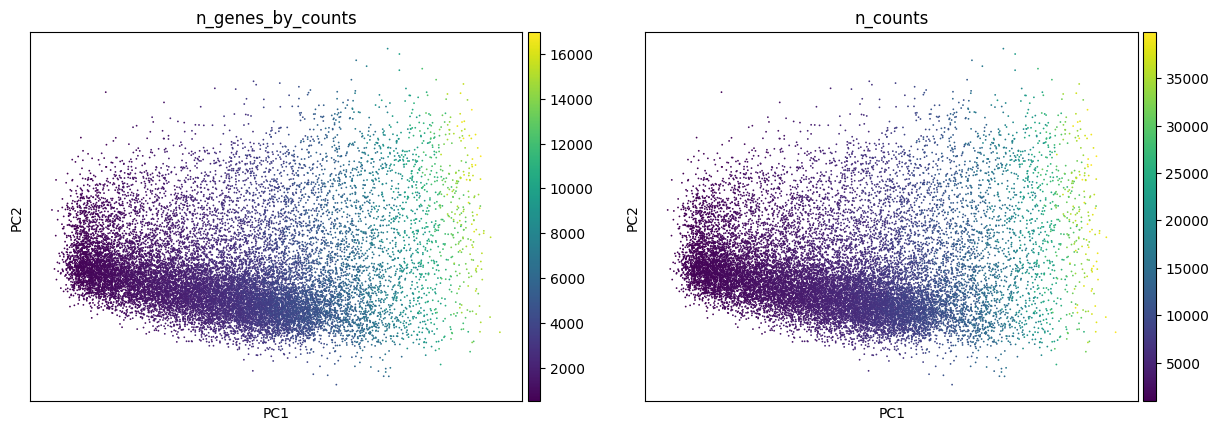

In [61]:
sc.pl.pca(atac, color=["n_genes_by_counts", "n_counts"])

In [62]:
sc.pp.neighbors(atac, n_neighbors=10, n_pcs=30)

In [63]:
sc.tl.leiden(atac, resolution=.5)

In [64]:
sc.tl.umap(atac, spread=1.5, min_dist=.5, random_state=20)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


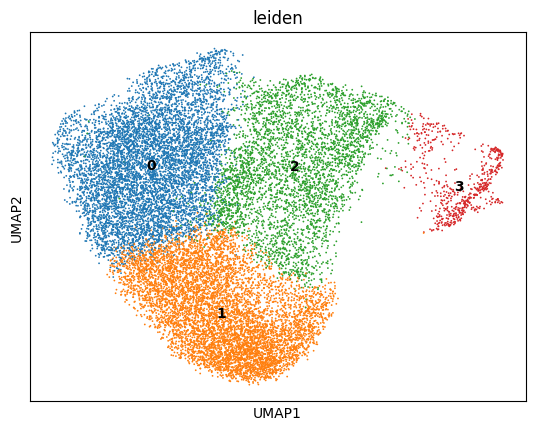

In [65]:
sc.pl.umap(atac, color="leiden", legend_loc="on data")

In [66]:
mdata.mod['rna'] = rna

In [67]:
mdata.mod['atac'] = atac

In [68]:
mdata = mdata.copy()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [69]:
mu.pp.intersect_obs(mdata)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [70]:
mdata.var['gene_ids'].to_csv('/Users/isabelgiray/Desktop/Barcodes_Gene_ids_2.tsv', sep='\t', index=False)

# Create tsv for barcodes-genes-expressioncount-classification

In [71]:
barcodes = mdata.mod['rna'].obs.index
gene_ids = mdata.mod['rna'].var['gene_ids']

In [72]:
expression_matrix = mdata.mod['rna'].X
if not isinstance(expression_matrix, np.ndarray):
    expression_matrix = expression_matrix.toarray() 

In [73]:
data = pd.DataFrame(
    {
        'barcode': np.repeat(barcodes, len(gene_ids)),
        'gene_id': np.tile(gene_ids, len(barcodes)),
        'expression_count': expression_matrix.flatten()
    }
)

In [74]:
data

,barcode,gene_id,expression_count
0,AAACAGCCAAACGCGA-2,ENSG00000235146,0.000000
1,AAACAGCCAAACGCGA-2,ENSG00000187634,0.240150
2,AAACAGCCAAACGCGA-2,ENSG00000187583,0.000000
3,AAACAGCCAAACGCGA-2,ENSG00000205231,0.000000
4,AAACAGCCAAACGCGA-2,ENSG00000228750,0.000000
...,...,...,...
27353995,TTTGTTGGTTGAGGTC-3,ENSG00000198886,1.907476
27353996,TTTGTTGGTTGAGGTC-3,ENSG00000198786,1.573612
27353997,TTTGTTGGTTGAGGTC-3,ENSG00000198727,3.001725
27353998,TTTGTTGGTTGAGGTC-3,ENSG00000277666,0.000000


In [75]:
data1 = data[data['expression_count'] != 0]

In [76]:
data1['expression_count'].mean()

0.92328924

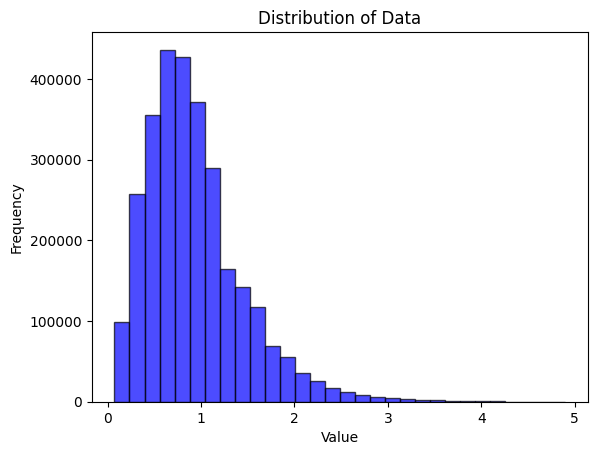

In [77]:
plt.hist(data1['expression_count'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [78]:
mean_expression = data1['expression_count'].mean()

In [79]:
#Create a new column 'classification' based on the mean
data['classification'] = data['expression_count'].apply(
    lambda x: 'high' if x > mean_expression  
            else 'zero' if x == 0 
            else 'low'
)

In [80]:
classification_counts = data['classification'].value_counts()

In [81]:
classification_counts

classification
zero    24455199
low      1691357
high     1207444
Name: count, dtype: int64

In [84]:
data.to_csv('/Users/isabelgiray/Desktop/classification_mean.tsv', sep='\t', index=False)